**Random Forest**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

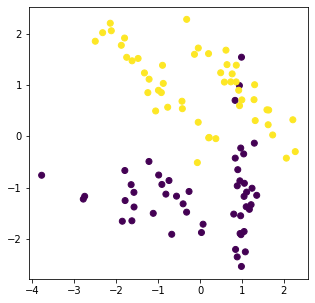

In [2]:
clf = RandomForestClassifier(n_estimators=100).fit(...)
clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features=3).fit(...)

from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,
                           n_redundant=0, n_informative=2,
                           random_state=1234)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

# 데이터 분할
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 학습
T = 10 # Tree의 개수

clf = RandomForestClassifier(n_estimators=T,
                             max_depth=2).fit(trn_X, trn_y)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest 예측
prd = clf.predict(tst_X)
print("Confusion Matrix \n", confusion_matrix(y_true=tst_y, y_pred=prd))
print(classification_report(y_true=tst_y, y_pred=prd))

Confusion Matrix 
 [[17  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



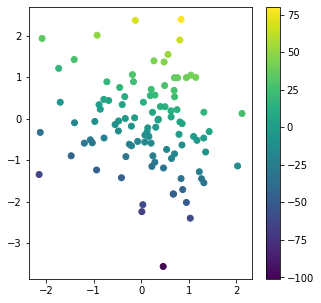

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_features=2,
                       n_informative=2, random_state=1234)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
plt.show()

In [ ]:
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RF_reg
reg = RF_reg(n_estimators=T,
             max_depth=2, random_state=1234).fit(trn_X, trn_y)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
prd = reg.predict(tst_X)

MAE = mean_absolute_error(y_true=tst_y, y_pred=prd)
RMSE = np.sqrt(mean_squared_error(y_true=tst_y, y_pred=prd))
MAPE = mean_absolute_percentage_error(y_true=tst_y, y_pred=prd)
print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('MAPE: ', MAPE)

MAE:  9.248991456011144
RMSE:  11.970166506374449
MAPE:  0.5853743746923327


**Variable Importance**

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10,
                           n_informative=3, n_redundant=0,
                           n_repeated=0, n_classes=2, shuffle=2,
                           random_state=1234)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, stratify=y, test_size=0.3,
                                              random_state=1234)
print(trn_X.shape, tst_X.shape)

(700, 10) (300, 10)


In [ ]:
clf = RandomForestClassifier().fit(trn_X, trn_y)

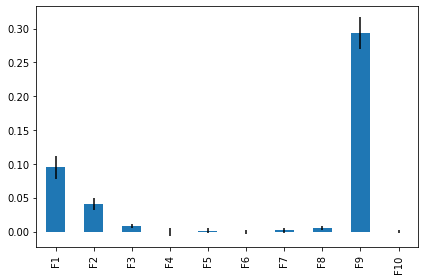

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
perm_imp = permutation_importance(clf, tst_X, tst_y,
                                  n_repeats=10, random_state=1234, n_jobs=-1)

feature_names = ['F'+str(i+1) for i in range(X.shape[1])]
perm_imp_df = pd.Series(perm_imp.importances_mean, index=feature_names)

y_err = perm_imp.importances_std

# Variable importance plot
fig, ax = plt.subplots()
perm_imp_df.plot.bar(yerr=y_err, ax=ax)
fig.tight_layout()
plt.show()